In [1]:
from find_segmentation_line import * 
# import importlib
# importlib.reload(find_segmentation_line)

FilePosition 512
FilePosition 512


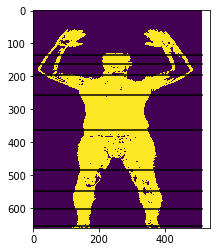

In [2]:
root_folder = r'E:\Juyue\Kaggle_Data\sample\sample\subject_1'
data = ld.load_data_for_one_subject(root_folder)
I_ver_orig = data['.a3d']
I_front = np.flipud(data['.a3daps'][:,:,0].transpose())
I_front_mask = create_mask_from_image(I_front)
seg_hor = find_segmentation_hor(I_front_mask, plot_flag = True)


In [3]:
seg_ver = find_segmentation_ver(data['.a3d'], data['.a3daps'], seg_hor)

C:\ProgramData\Anaconda3\envs\tensorflow_kaggle_clone\lib\site-packages\skimage\morphology\misc.py:122: UserWarning: Only one label was provided to `remove_small_objects`. Did you mean to use a boolean array?
  warn("Only one label was provided to `remove_small_objects`. "


{'back_left': array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]]), 'back_middle': array([[  0. ,   0. ,   0. , ..., -31.3, -22.9, -14.5],
       [  0. ,   0. ,   0. , ...,   0. ,   0. ,   0. ]]), 'back_right': array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]]), 'front_left': array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]]), 'front_middle': array([[ 0. ,  0. ,  0. , ...,  2. ,  2.5,  1.3],
       [ 0. ,  0. ,  0. , ...,  0. ,  0. ,  0. ]]), 'front_right': array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]]), 'left_trunk': array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]]), 'right_trunk': array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])}


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


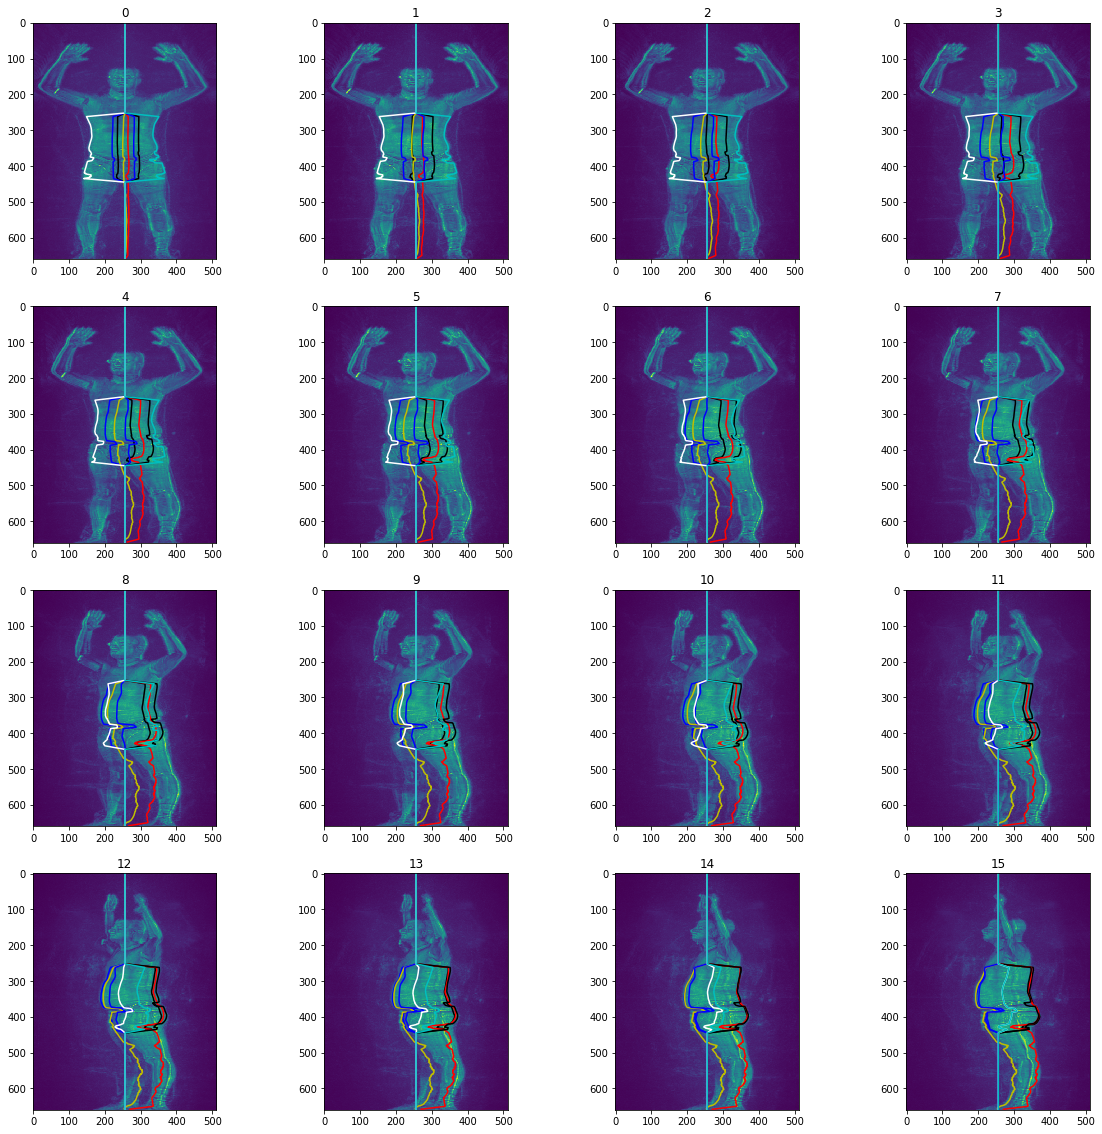

In [4]:
for ii in range(16):
    I_plot = np.flipud(data['.a3daps'][:, :,ii].transpose())
    if ii%16 == 0:
        fig = plt.figure(figsize=(20, 20))
        counter = 1
    ax = plt.subplot(4, 4, counter)
    counter = counter + 1
    find_segmentation_ver_utils_plotline(I_plot , seg_ver[ii], ax = ax)
    ax.set_title('%d' % ii)
plt.show()

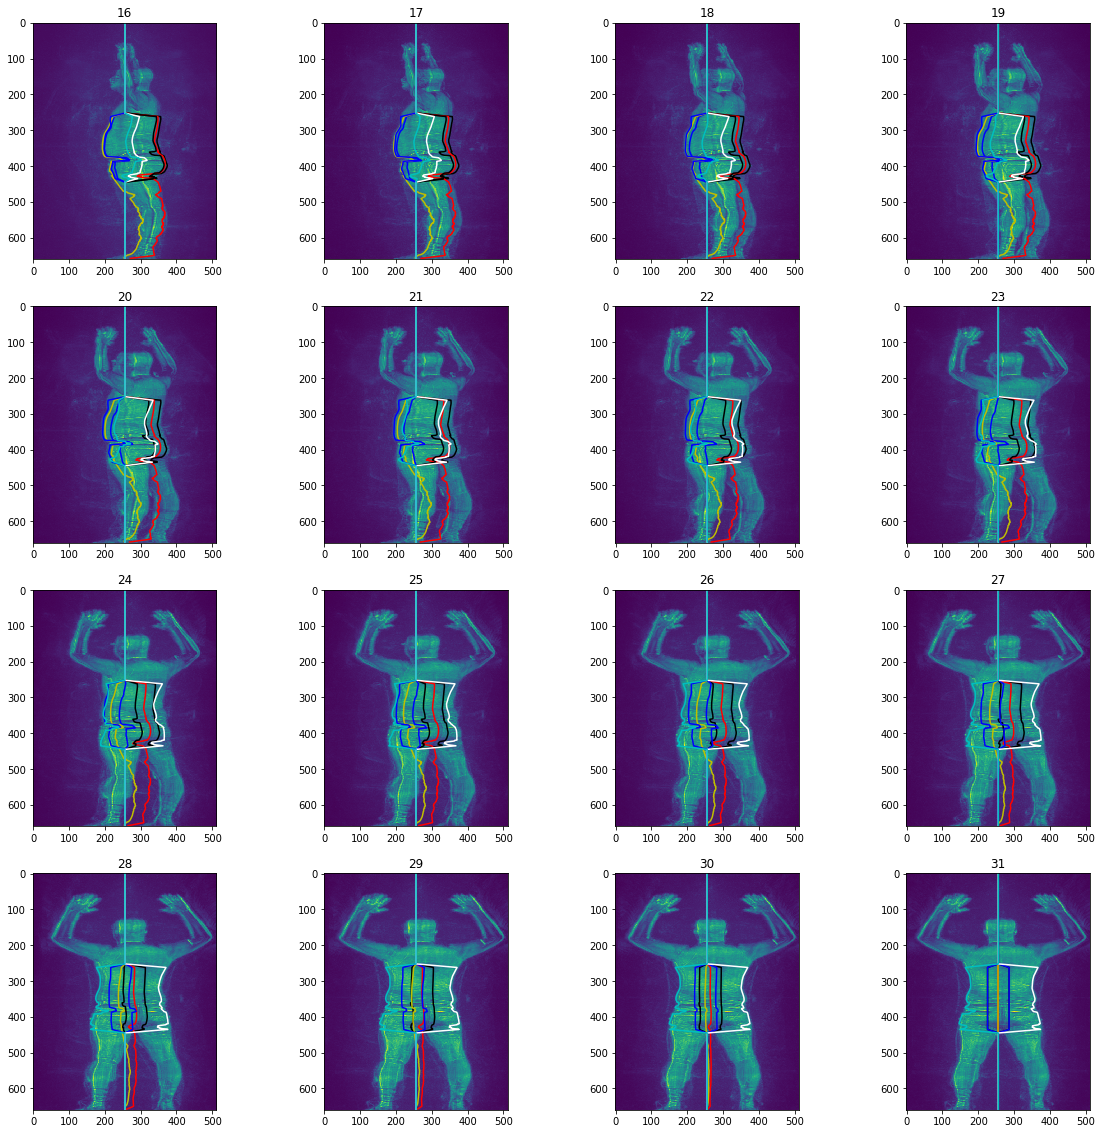

In [5]:
for ii in range(16, 32):
    I_plot = np.flipud(data['.a3daps'][:, :,ii].transpose())
    if ii%16 == 0:
        fig = plt.figure(figsize=(20, 20))
        counter = 1
    ax = plt.subplot(4, 4, counter)
    counter = counter + 1
    find_segmentation_ver_utils_plotline(I_plot , seg_ver[ii], ax = ax)
    ax.set_title('%d' % ii)
plt.show()

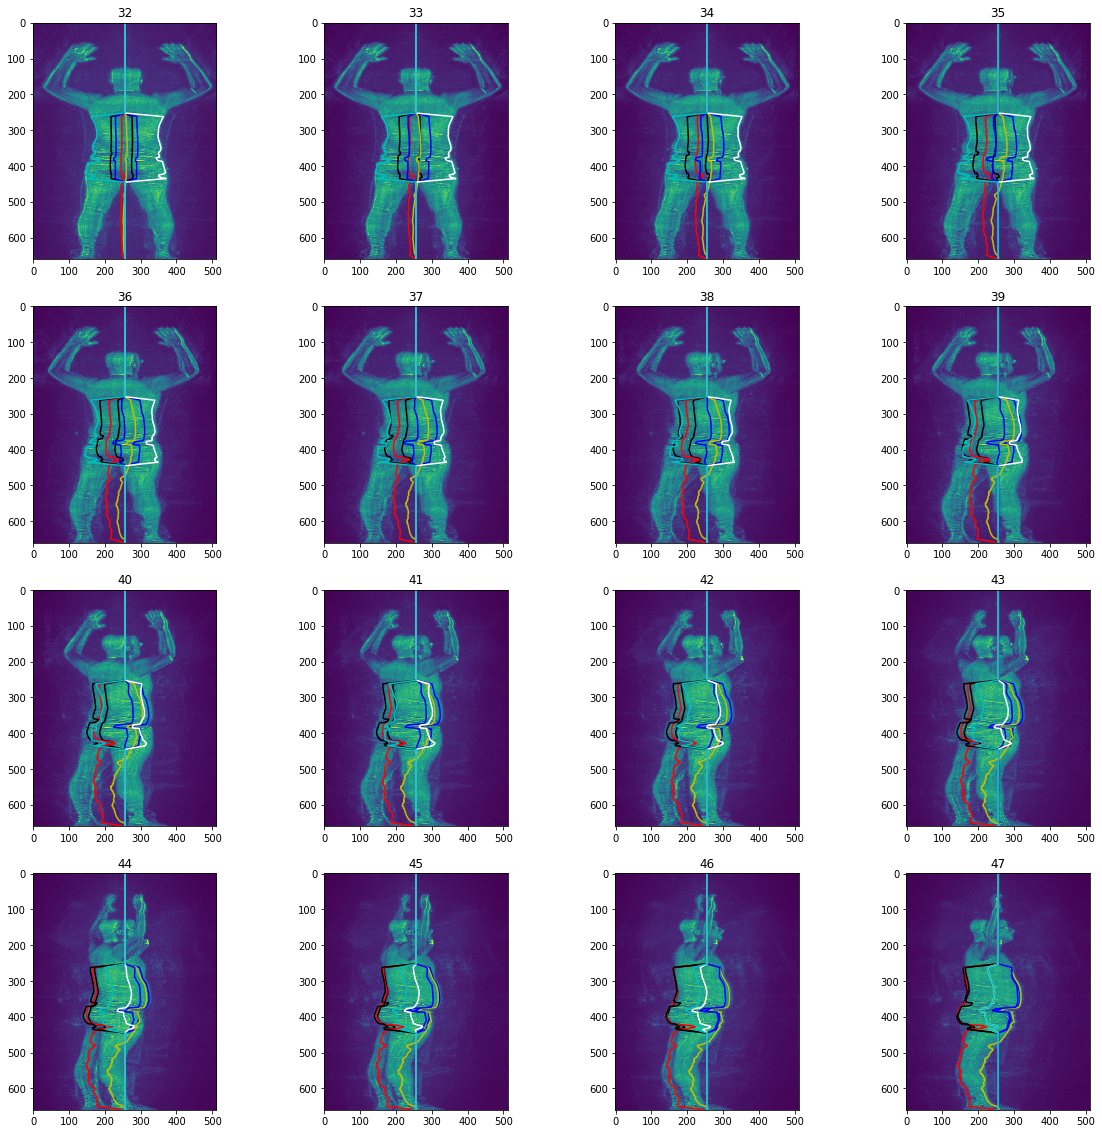

In [6]:
for ii in range(32, 48):
    I_plot = np.flipud(data['.a3daps'][:, :,ii].transpose())
    if ii%16 == 0:
        fig = plt.figure(figsize=(20, 20))
        counter = 1
    ax = plt.subplot(4, 4, counter)
    counter = counter + 1
    find_segmentation_ver_utils_plotline(I_plot , seg_ver[ii], ax = ax)
    ax.set_title('%d' % ii)
plt.show()

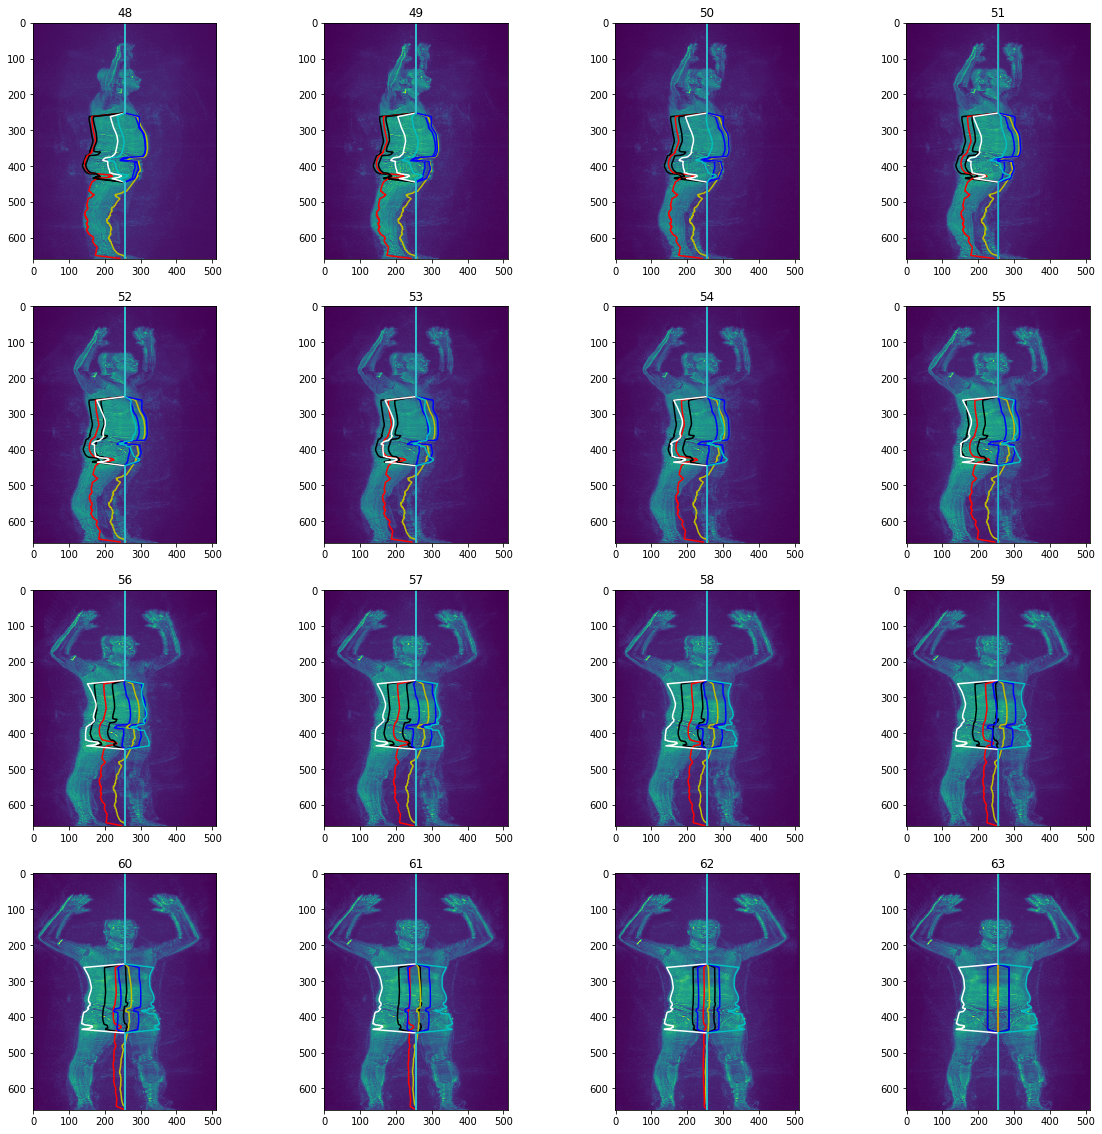

In [7]:
for ii in range(48, 64):
    I_plot = np.flipud(data['.a3daps'][:, :,ii].transpose())
    if ii%16 == 0:
        fig = plt.figure(figsize=(20, 20))
        counter = 1
    ax = plt.subplot(4, 4, counter)
    counter = counter + 1
    find_segmentation_ver_utils_plotline(I_plot , seg_ver[ii], ax = ax)
    ax.set_title('%d' % ii)
plt.show()

In [ ]:
# now using the segmented line to do the zone assignment.

    # finish!! great!

def front_image_segmentation_line_to_zone_front(seg_hor, seg_ver, I_mask):
    n_zone = 17;
    (n_x, n_y) = I_mask.shape
    middle_of_elbow = int((seg_hor['left_elbow'] + seg_hor['right_elbow'])/2);
    middle_y = int(n_y/2)
    
    zone_mask = np.zeros((n_x, n_y, n_zone)) == 1
    ver_0 = np.zeros(n_x).astype(np.int64)
    ver_ny = np.ones(n_x).astype(np.int64) * (n_y - 1)
    
    left_trunk  = np.mean(seg_ver['left_trunk' ][seg_hor['chest']:seg_hor['waist']]).astype(np.int64)
    right_trunk = np.mean(seg_ver['right_trunk'][seg_hor['chest']:seg_hor['waist']]).astype(np.int64)
    # first, change the vertical part into int indices
    
    # on the vertical part, it is not a straight line anymore, but many indices
    zone_segmentation_utils_fill_in_one_zone(zone_mask, 2, 0, seg_hor['left_elbow'], ver_0, seg_ver['front_middle'])
    zone_segmentation_utils_fill_in_one_zone(zone_mask, 1, seg_hor['left_elbow'], seg_hor['chest'],\
                                             ver_0,seg_ver['front_middle'], ver_ny)
    
    zone_segmentation_utils_fill_in_one_zone(zone_mask, 4, 0, seg_hor['right_elbow'], \
                                            seg_ver['front_middle'], ver_ny)
    zone_segmentation_utils_fill_in_one_zone(zone_mask, 3, seg_hor['right_elbow'], seg_hor['chest'], \
                                            seg_ver['right_trunk'], ver_ny)
    zone_segmentation_utils_fill_in_one_zone(zone_mask, 5, middle_of_elbow, seg_hor['chest'], \
                                            left_trunk, right_trunk)
    
    zone_segmentation_utils_fill_in_one_zone(zone_mask, 6, middle_of_elbow, seg_hor['chest'], \
                                            left_trunk, right_trunk)
    zone_segmentation_utils_fill_in_one_zone(zone_mask, 6, middle_of_elbow, seg_hor['chest'], \
                                            left_trunk, right_trunk)
    
    zone_segmentation_utils_fill_in_one_zone(zone_mask, 6, seg_hor['chest'],seg_hor['waist'], \
                                             ver_0, seg_ver['front_middle'] )
    zone_segmentation_utils_fill_in_one_zone(zone_mask, 7, seg_hor['chest']      : seg_hor['waist'], \
                                             seg_ver['front_middle'], ver_ny)
    
    zone_segmentation_utils_fill_in_one_zone(zone_mask, 8, seg_hor['waist'],seg_hor['thigh'], \
                                             ver_0, seg_ver['front_left'])
    zone_segmentation_utils_fill_in_one_zone(zone_mask, 9, seg_hor['waist'],seg_hor['thigh'], \
                                             seg_ver['front_left'], seg_ver['front_right'])
    zone_segmentation_utils_fill_in_one_zone(zone_mask, 10, seg_hor['waist'],seg_hor['thigh'], \
                                             seg_ver['front_right'], ver_ny)
    
    zone_segmentation_utils_fill_in_one_zone(zone_mask, 11, seg_hor['thigh'],seg_hor['knee_upper'], \
                                             ver_0, seg_ver['front_middle'])
    zone_segmentation_utils_fill_in_one_zone(zone_mask, 12, seg_hor['thigh'],seg_hor['knee_upper'], \
                                             seg_ver['front_middle'], ver_ny)
    zone_segmentation_utils_fill_in_one_zone(zone_mask, 13, seg_hor['knee_upper'], seg_hor['knee_lower'], \
                                             ver_0, seg_ver['front_middle'])
    zone_segmentation_utils_fill_in_one_zone(zone_mask, 14, seg_hor['knee_upper'], seg_hor['knee_lower'], \
                                             seg_ver['front_middle'], ver_ny)
    zone_segmentation_utils_fill_in_one_zone(zone_mask, 13, seg_hor['knee_lower'],seg_hor['foot'], \
                                             ver_0, seg_ver['front_middle'])
    zone_segmentation_utils_fill_in_one_zone(zone_mask, 14, seg_hor['knee_lower'],seg_hor['foot'], \
                                             seg_ver['front_middle'], ver_ny)
                        
    zone_mask_combine = np.zeros((n_x, n_y));
    for zz in range(n_zone):
        zone_mask_combine[zone_mask[:,:,zz] & I_mask] = zz;
    
    return zone_mask_combine


In [132]:
def zone_segmentation_utils_fill_in_one_zone(zone_mask, zone_num, seg_hor_start, seg_hor_end, seg_ver_start, seg_ver_end):
    # seg_hor_start, seg_hor_end will be two scalers
    # seg_ver_start, seg_ver_end will be two vectors.
    if len(seg_ver_start) == 1:
        zone_mask[seg_hor_start: seg_hor_end,  seg_ver_start: seg_ver_end, zone_num]= True
    else:
        print(seg_hor_start, seg_hor_end)
        for ii in range(seg_hor_start, seg_hor_end):
            zone_mask[ii, seg_ver_start[ii]: seg_ver_end[ii], zone_num] = True

    
def front_image_segmentation_line_to_zone(seg_hor, seg_ver, I_mask, seg_ver_zone, seg_hor_zone, image_num):
    n_zone = 17;
    (n_x, n_y) = I_mask.shape
    middle_of_elbow = int((seg_hor['left_elbow'] + seg_hor['right_elbow'])/2);
    middle_y = int(n_y/2)
    
    zone_mask = np.zeros((n_x, n_y, n_zone)) == 1
    ver_0 = np.zeros(n_x).astype(np.int64)
    ver_ny = np.ones(n_x).astype(np.int64) * (n_y - 1)
    
    ## you have to make verything into a big dictionary...
    ## for the left_trunk and right trunk. you will have to change it.
    seg_ver_used = cp.copy(seg_ver)
    left_trunk  = np.mean(seg_ver['left_trunk' ][seg_hor['chest']:seg_hor['waist']]) * np.ones(n_y)
    right_trunk = np.mean(seg_ver['right_trunk'][seg_hor['chest']:seg_hor['waist']]) * np.ones(n_y)
     
    seg_ver_used['left_trunk'] = left_trunk.astype(np.int64)
    seg_ver_used['right_trunk'] = right_trunk.astype(np.int64)
    seg_ver_used['0'] = np.zeros(n_x).astype(np.int64)
    seg_ver_used['ny'] = np.ones(n_x).astype(np.int64) * (n_y - 1)
   
    seg_hor_used = cp.copy(seg_hor)
    seg_hor_used['0'] = 0
    seg_hor_used['nx'] = n_y - 1
    
    # turn seg_hor, seg_ver into integers.
    for key, value in seg_ver_used.items():
        seg_ver_used[key] = seg_ver_used[key].astype(np.int64)
    
    flag = seg_ver_zone['flag'][:, image_num]
    ver_start = seg_ver_zone['start'][:, image_num]
    ver_end   = seg_ver_zone['end'][:, image_num]
    hor_start = seg_hor_zone['start']
    hor_end = seg_hor_zone['end']
          
    ver_key = zone_segmentation_utils_verline_number_to_name()
    hor_key = zone_segmentation_utils_horline_number_to_name()
    print(hor_start.shape)
    print(hor_end.shape)
    for ii in range(n_zone):
        if flag[ii]:
#             print('region %d is being calculated' % (ii))
#             print(zone_mask.shape)
            zone_segmentation_utils_fill_in_one_zone(zone_mask, ii, seg_hor_used[hor_key[hor_start[ii]]], seg_hor_used[hor_key[hor_end[ii]]],
                                                     seg_ver_used[ver_key[ver_start[ii]]], seg_ver_used[ver_key[ver_end[ii]]])
    
    zone_mask_combine = np.zeros((n_x, n_y));
    for zz in range(n_zone):
        zone_mask_combine[zone_mask[:,:,zz] & I_mask] = zz;
    
    return zone_mask_combine
    

In [111]:
seg_hor_zone

{'end': array([5, 2, 5, 3, 6, 6, 6, 7, 7, 7, 8, 8, 9, 9, 5], dtype=int64),
 'start': array([2, 0, 3, 0, 4, 5, 5, 6, 6, 6, 7, 7, 8, 8, 9, 9, 4], dtype=int64)}

In [135]:
I_front = np.flipud(data['.a3daps'][:,:,0].transpose())
I_front_mask = create_mask_from_image(I_front)
zone_mask_combine = front_image_segmentation_line_to_zone(seg_hor, seg_ver[0], I_front_mask, seg_ver_zone, seg_hor_zone, 0)

(17,)
(17,)
161 257
0 161
159 257
0 159
196 364
257 364
257 364
364 483
364 483
364 483
483 547
483 547
547 601
547 601
601 511
601 511


In [ ]:
# take a look at the body segmentation map?

In [129]:
def zone_segmentation_utils_verline_number_to_name():
    num_to_key = {0:'0',
            1: 'back_left',
            2: 'back_middle',
            3: 'back_right',
            4: 'front_left',
            5: 'front_middle',
            6: 'front_right',
            7: 'left_trunk',
            8: 'right_trunk',
            9: 'ny'}
    return num_to_key 
def zone_segmentation_utils_horline_number_to_name():
    num_to_key = {0:'0',
            1: 'head',
            2: 'left_elbow',
            3: 'right_elbow',
            4: 'neck',
            5: 'chest',
            6: 'waist',
            7: 'thigh',
            8: 'knee_upper'
            9: 'knee_lower',
            10: 'nx'}
    return num_to_key 

SyntaxError: invalid syntax (<ipython-input-129-ac8885431eef>, line 23)

In [134]:

seg_ver_zone = zone_segmentation_utils_ver_to_zone()
seg_hor_zone = zone_segmentation_utils_hor_to_zone()

In [131]:
def zone_segmentation_utils_hor_to_zone():
    n_zone = 17     
    hor_start = np.zeros(n_zone)
    hor_end = np.zeros(n_zone)
    
    ver_start = np.array([2,0,3,0,4, 5,5,6,6,6,7,7,8,8,9,9,4]).astype(np.int64)
    ver_end = np.array(  [5,2,5,3,6, 6,6,7,7,7,8,8,9,9,10,10,5]).astype(np.int64)
    
    seg_hor_zone = {'start': ver_start,
                    'end': ver_end}
    return  seg_hor_zone
    
    
def zone_segmentation_utils_ver_to_zone():
    n_zone = 17
    n_image = 64 

    ver_start = np.zeros((n_zone, n_image))
    ver_end = np.zeros((n_zone, n_image))
    flag = np.zeros((n_zone, n_image)).astype(np.bool)
    
    image_id_1_1 = np.arange(0, 8)
    image_id_1_2 =  np.arange(26, 41)
    image_id_1_3 = np.arange(52,64)
    image_id_1 = np.concatenate((image_id_1_1 , image_id_1_2, image_id_1_3))
    flag[0, image_id_1] = True
    ver_start[0, image_id_1_1] = 0
    ver_end[0,image_id_1_1] = 7
    ver_start[0, image_id_1_2] = 7
    ver_end[0,image_id_1_2] = 9
    ver_start[0, image_id_1_3] = 0
    ver_end[0,image_id_1_3] = 7
    
    
    image_id_2_1 = np.arange(0, 13)
    image_id_2_2 =  np.arange(18, 45)
    image_id_2_3 = np.arange(49,64)
    image_id_2 = np.concatenate((image_id_2_1 , image_id_2_2, image_id_2_3))
    flag[1, image_id_2] = True
    ver_start[1, image_id_2_1] = 0
    ver_end[1,image_id_2_1] = 5
    ver_start[1, image_id_2_2] = 5
    ver_end[1,image_id_2_2] = 9
    ver_start[1, image_id_2_3] = 0
    ver_end[1,image_id_2_3] = 5
    
    image_id_3_1 = np.arange(0, 14)
    image_id_3_2 =  np.arange(22, 39)
    image_id_3_3 = np.arange(55,64)
    image_id_3 = np.concatenate((image_id_3_1 , image_id_3_2, image_id_3_3))
    flag[2, image_id_3] = True
    ver_start[2, image_id_3_1] = 8
    ver_end[2,image_id_3_1] = 9
    ver_start[2, image_id_3_2] = 0
    ver_end[2,image_id_3_2] = 8
    ver_start[2, image_id_3_3] = 8
    ver_end[2,image_id_3_3] = 9
    
    image_id_4_1 = np.arange(0, 13)
    image_id_4_2 =  np.arange(18, 43)
    image_id_4_3 = np.arange(52,64)
    image_id_4 = np.concatenate((image_id_4_1 , image_id_4_2, image_id_4_3))
    flag[3, image_id_4] = True
    ver_start[3, image_id_4_1] = 5
    ver_end[3,image_id_4_1] = 9
    ver_start[3, image_id_4_2] = 0
    ver_end[3,image_id_4_2] = 5
    ver_start[3, image_id_4_3] = 5
    ver_end[3,image_id_4_3] = 9
    
    image_id_5_1 = np.arange(0, 7)
    image_id_5_2 =  np.arange(56, 41)
    image_id_5 = np.concatenate((image_id_5_1 , image_id_5_2))
    flag[4, image_id_5] = True
    ver_start[4, image_id_5_1] = 7
    ver_end[4,image_id_5_1] = 8
    ver_start[4, image_id_5_2] = 7
    ver_end[4,image_id_5_2] = 8

    image_id_17_1 = np.arange(24, 39)
    image_id_17 = image_id_17_1
    flag[16, image_id_17] = True
    ver_start[16, image_id_17_1] = 8
    ver_end[16,image_id_17_1] = 7

    image_id_6_1 = np.arange(0, 8)
    image_id_6_2 =  np.arange(20, 48)
    image_id_6_3 = np.arange(49,64)
    image_id_6 = np.concatenate((image_id_6_1 , image_id_6_2, image_id_6_3))
    flag[5, image_id_6] = True
    ver_start[5, image_id_6_1] = 0
    ver_end[5,image_id_6_1] = 5
    ver_start[5, image_id_6_2] = 2
    ver_end[5,image_id_6_2] = 9
    ver_start[5, image_id_6_3] = 0
    ver_end[5,image_id_6_3] = 5
    
    # need to be checked later on.
    image_id_7_1 = np.arange(0, 15)
    image_id_7_2 =  np.arange(16, 31)
    image_id_7_3 = np.arange(32,40)
    image_id_7_4 = np.arange(55,64)
    image_id_7 = np.concatenate((image_id_7_1 , image_id_7_2, image_id_7_3, image_id_7_4))
    flag[6, image_id_7] = True
    ver_start[6, image_id_7_1] = 5
    ver_end[6,image_id_7_1] = 9
    ver_start[6, image_id_7_2] = 5
    ver_end[6,image_id_7_2] = 2
    ver_start[6, image_id_7_3] = 0
    ver_end[6,image_id_7_3] = 2
    ver_start[6, image_id_7_4] = 5
    ver_end[6,image_id_7_4] = 9
    
    image_id_8_1 = np.arange(0, 7)
    image_id_8_2 =  np.arange(24, 48)
    image_id_8_3 = np.arange(48,64)
    image_id_8 = np.concatenate((image_id_8_1 , image_id_8_2, image_id_8_3))
    flag[7, image_id_8] = True
    ver_start[7, image_id_8_1] = 0
    ver_end[7,image_id_8_1] = 4
    ver_start[7, image_id_8_2] = 1
    ver_end[7,image_id_8_2] = 9
    ver_start[7, image_id_8_3] = 0
    ver_end[7,image_id_8_3] = 4
    
    image_id_9_1 = np.arange(0, 8)
    image_id_9_2 =  np.arange(18, 40)
    image_id_9_3 = np.arange(54,64)
    image_id_9 = np.concatenate((image_id_9_1 , image_id_9_2, image_id_9_3))
    flag[8, image_id_9] = True
    ver_start[8, image_id_9_1] = 4
    ver_end[8,image_id_9_1] = 6
    ver_start[8, image_id_9_2] = 3
    ver_end[8,image_id_9_2] = 1
    ver_start[8, image_id_9_3] = 4
    ver_end[8,image_id_9_3] = 6
    
    image_id_10_1 = np.arange(0, 15)
    image_id_10_2 =  np.arange(16, 38)
    image_id_10_3 = np.arange(58,64)
    image_id_10 = np.concatenate((image_id_10_1 , image_id_10_2, image_id_10_3))
    flag[9, image_id_10] = True
    ver_start[9, image_id_10_1] = 6
    ver_end[9,image_id_10_1] = 9
    ver_start[9, image_id_10_2] = 0
    ver_end[9,image_id_10_2] = 3
    ver_start[9, image_id_10_3] = 6
    ver_end[9,image_id_10_3] = 9
    
    image_id_11_1 = np.arange(0, 11)
    image_id_11_2 =  np.arange(17, 48)
    image_id_11_3 = np.arange(49,64)
    image_id_11 = np.concatenate((image_id_11_1 , image_id_11_2, image_id_11_3))
    flag[10, image_id_11] = True
    ver_start[10, image_id_11_1] = 0
    ver_end[10,image_id_11_1] = 5
    ver_start[10, image_id_11_2] = 2
    ver_end[10,image_id_11_2] = 9
    ver_start[10, image_id_11_3] = 0
    ver_end[10,image_id_11_3] = 5
    
    flag[12, image_id_11] = True
    ver_start[12, :] = ver_start[10, :]
    ver_end[12,:] = ver_end[10,:]
   
    flag[14, image_id_11] = True
    ver_start[14, :] = ver_start[10, :]
    ver_end[14,:] = ver_end[10,:]
    
    
    image_id_12_1 = np.arange(0, 15)
    image_id_12_2 =  np.arange(16, 45)
    image_id_12_3 = np.arange(52,64)
    image_id_12 = np.concatenate((image_id_12_1 , image_id_12_2, image_id_12_3))
    flag[11, image_id_12] = True
    ver_start[11, image_id_12_1] = 5
    ver_end[11,image_id_12_1] = 9
    ver_start[11, image_id_12_2] = 0
    ver_end[11,image_id_12_2] = 2
    ver_start[11, image_id_12_3] = 5
    ver_end[11,image_id_12_3] = 9
    
    flag[13, image_id_11] = True
    ver_start[13, :] = ver_start[11, :]
    ver_end[13,:] = ver_end[11,:]
   
    flag[15, image_id_11] = True
    ver_start[15, :] = ver_start[11, :]
    ver_end[15,:] = ver_end[11,:]
    
    ver_start  = ver_start.astype(np.int64)
    ver_end = ver_end.astype(np.int64)
    
    seg_ver_zone = {'start': ver_start,
                    'end':   ver_end,
                    'flag': flag}
    return seg_ver_zone